## Task1

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read csv data into a datframe
data = pd.read_csv('../data/AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Data Understanding/ Exploration

In [6]:
# size of data
data.shape

(8077, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [9]:
data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Univariate Analysis

<AxesSubplot:ylabel='experiment'>

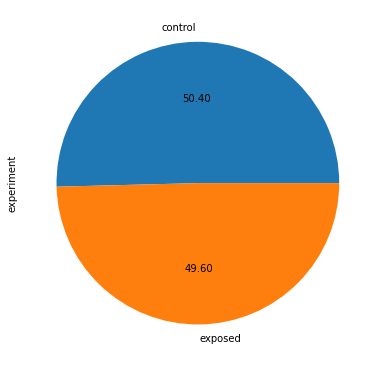

In [48]:
plt.figure(figsize=(13, 6.5))
data['experiment'].value_counts().plot(kind='pie', autopct='%.2f')

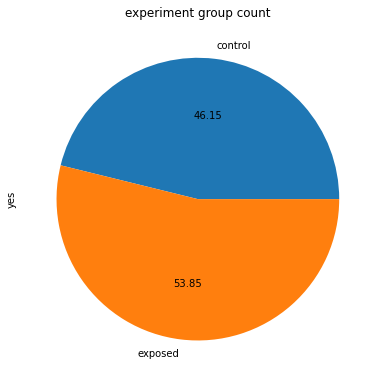

In [17]:
# yes experiments
plt.figure(figsize=(13, 6.5))
_ = data['yes'].groupby(data.experiment).sum().plot(kind='pie', autopct='%.2f')
plt.title("experiment group count")

plt.show()

<AxesSubplot:title={'center':'Count of date'}, xlabel='date', ylabel='count'>

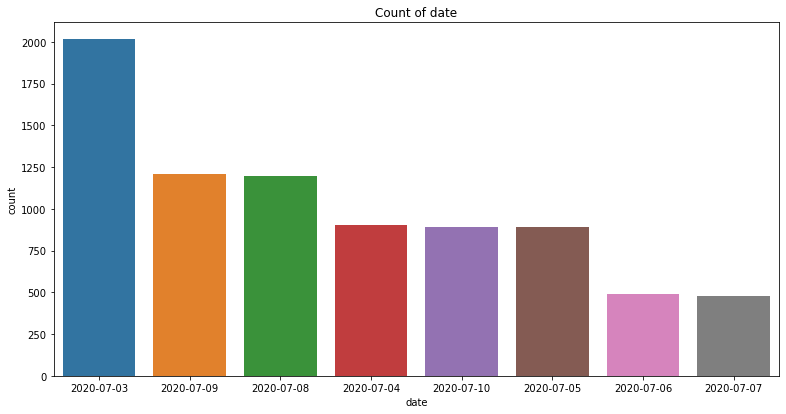

In [21]:
# date
plt.figure(figsize=(13,6.5))
plt.title('Count of date')
sns.countplot(x ='date', data = data, order = data['date'].value_counts().index)

<AxesSubplot:title={'center':'Hour count plot'}, xlabel='count', ylabel='hour'>

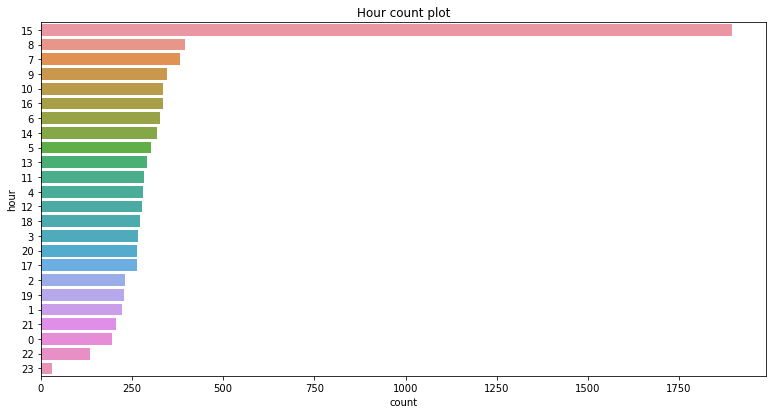

In [20]:
# hour
plt.figure(figsize=(13,6.5))
plt.title('Hour count plot')
sns.countplot(y ='hour', data = data, order = data['hour'].value_counts().index)

<AxesSubplot:>

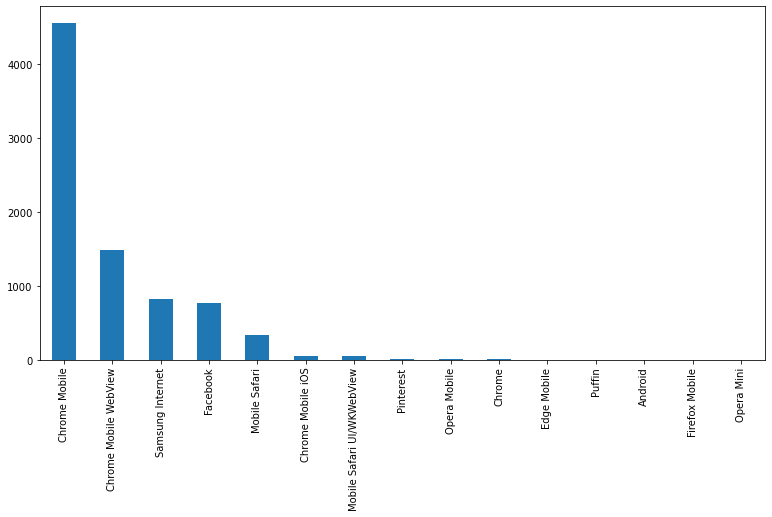

In [22]:
# count of browser type
data['browser'].value_counts().plot(kind='bar',figsize=[13,6.5])

<AxesSubplot:title={'center':'Top 20 Device make'}>

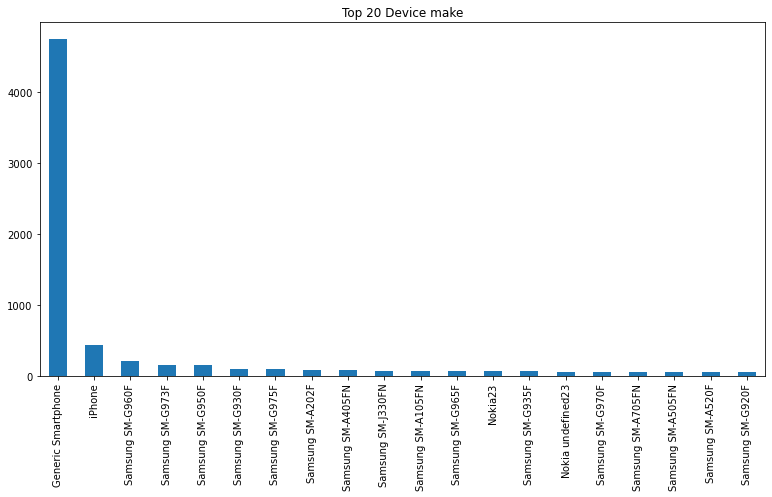

In [39]:
# top 20 device makes
plt.figure(figsize=(13, 6.5))
plt.title('Top 20 Device make')
data['device_make'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:title={'center':'Browser count plot'}, xlabel='count', ylabel='browser'>

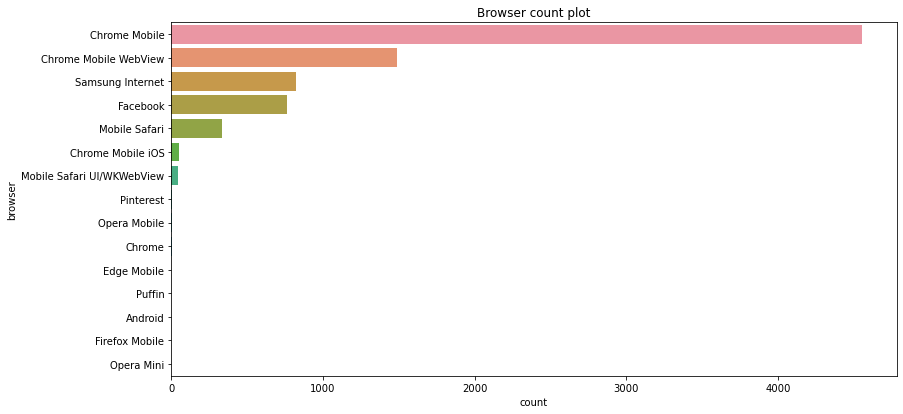

In [45]:
# browser
plt.figure(figsize=(13,6.5))
plt.title('Browser count plot')
sns.countplot(y ='browser', data = data, order = data['browser'].value_counts().index)

<AxesSubplot:xlabel='experiment', ylabel='yes'>

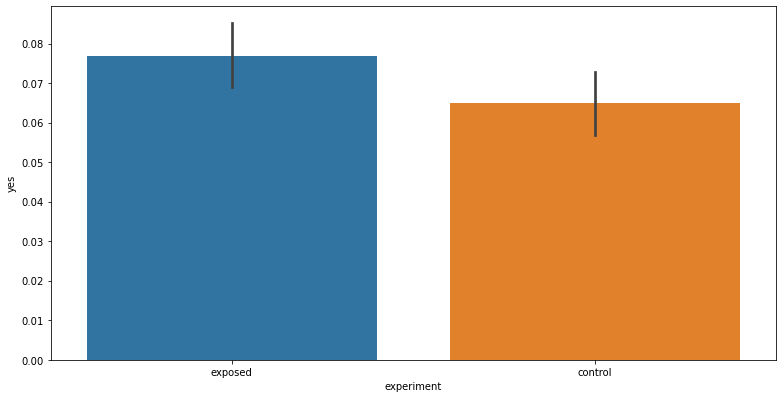

In [47]:
# yes experiment respo
plt.figure(figsize=(13,6.5))
sns.barplot(x = 'experiment', y='yes', data = data)

In [49]:
# unique values of variables
data.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

### Hypothesis testing

In [52]:
#subset of users with id and eexperiment group
users_df = pd.DataFrame(data[['auction_id', 'experiment']])
users_df['converted'] = data.yes # add column for response
users_df.head()

,auction_id,experiment,converted
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,0


In [53]:
# split the control and exposed groups
exposed = users_df[users_df.experiment == 'exposed']
control = users_df[users_df.experiment == 'control']

In [54]:
# pivot table to get the sum of converted users in each group
summary = users_df.pivot_table(values = 'converted', index = 'experiment', aggfunc = np.sum)
summary

,converted
experiment,
control,264
exposed,308


In [55]:
# add additional columns to the pivot table
summary['total'] = users_df.pivot_table(values='converted', index='experiment', aggfunc=lambda x: len(x))
summary['rate'] = users_df.pivot_table(values='converted', index='experiment')
summary

,converted,total,rate
experiment,,,
control,264,4071,0.064849
exposed,308,4006,0.076885
